<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here"). No need to select answers in a webform.**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

**Read data**

In [ ]:
train_df = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

In [ ]:
train_df.head(2)

In [ ]:
train_df.describe(include="all")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [6]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [7]:
train_df.shape

(712, 10)

In [9]:
df = train_df

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

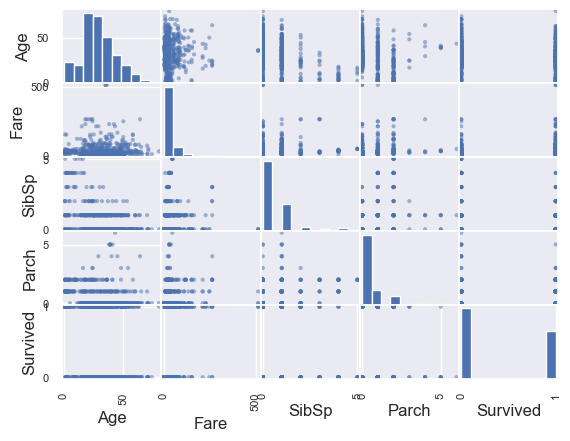

In [11]:
cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
pd.plotting.scatter_matrix(df[cols])
plt.show()

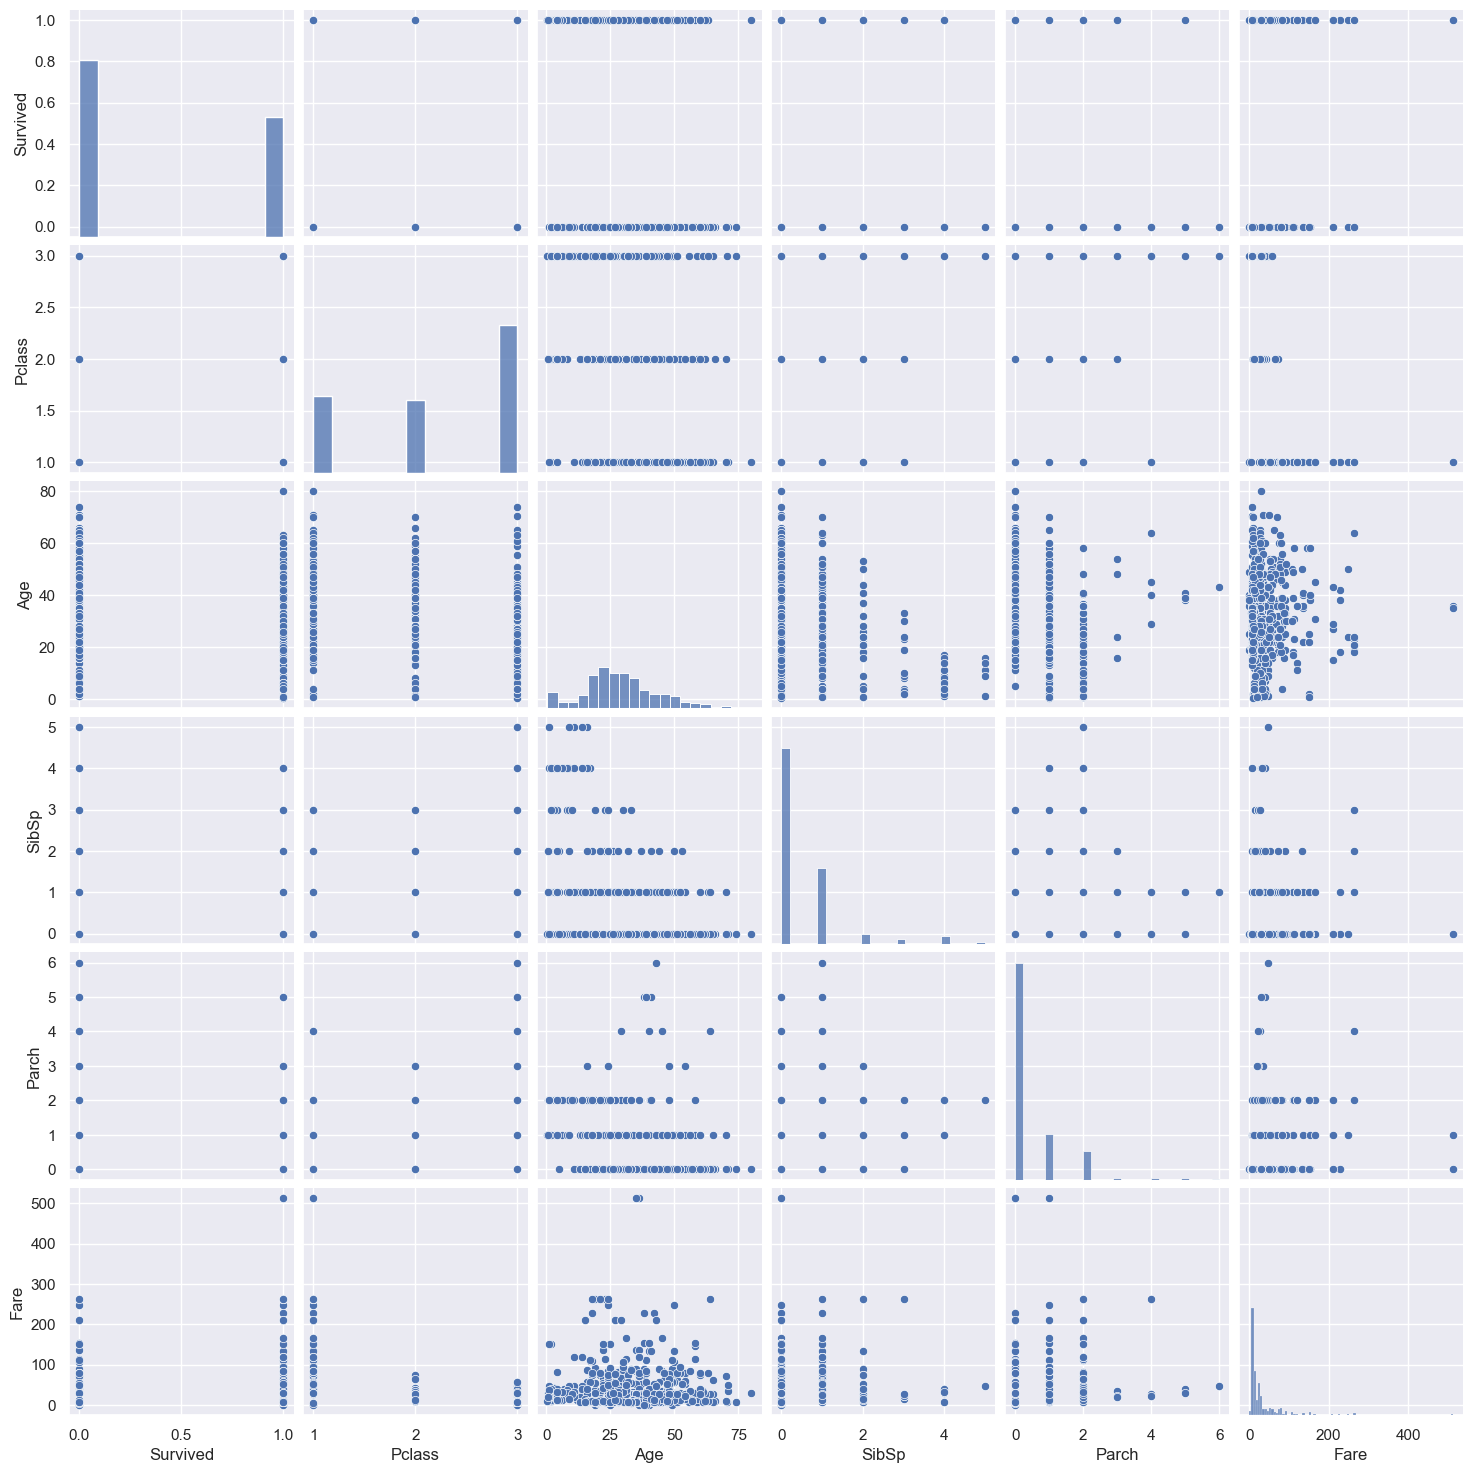

In [12]:
sns.pairplot(df)

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

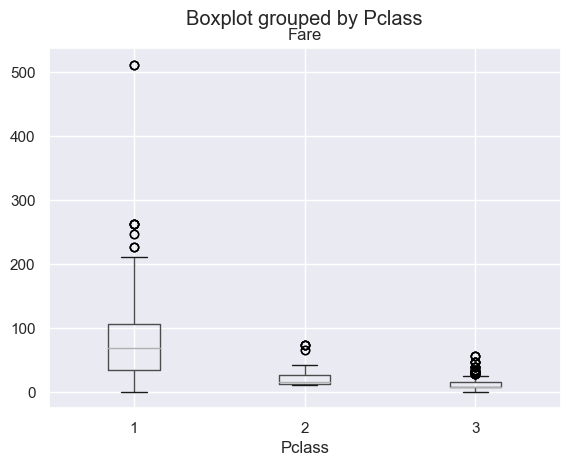

In [19]:
df.boxplot(column=['Fare'], by='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

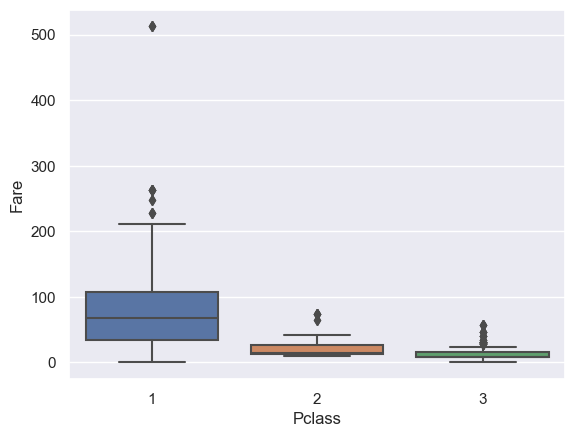

In [18]:
sns.boxplot(x='Pclass', y='Fare', data=df)

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

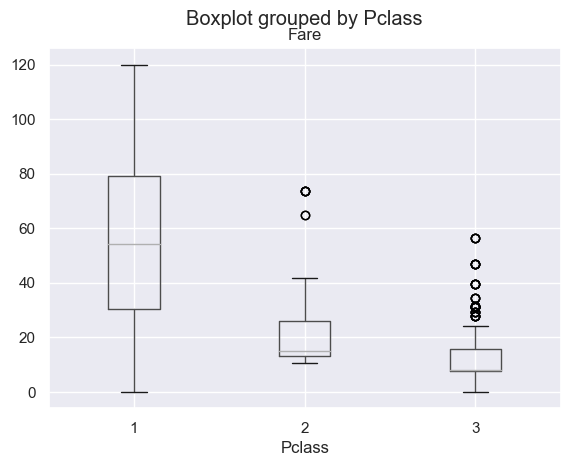

In [20]:
threshold = df['Fare'].quantile(0.95)
df[df['Fare'] <= threshold].boxplot(column=['Fare'], by='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

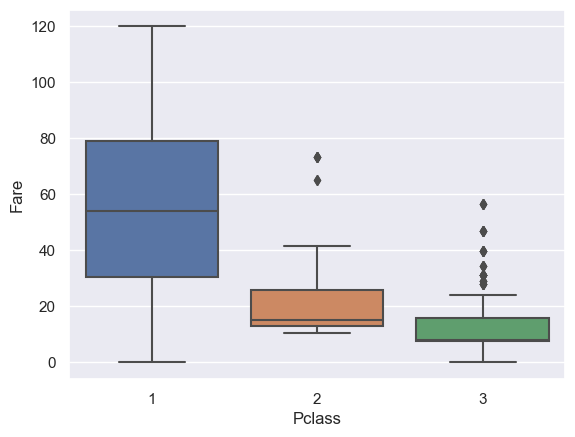

In [21]:
sns.boxplot(x='Pclass', y='Fare', data=df[df['Fare'] <= threshold])

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

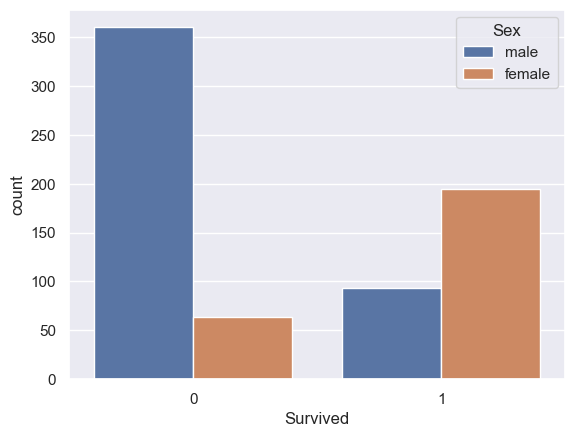

In [22]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

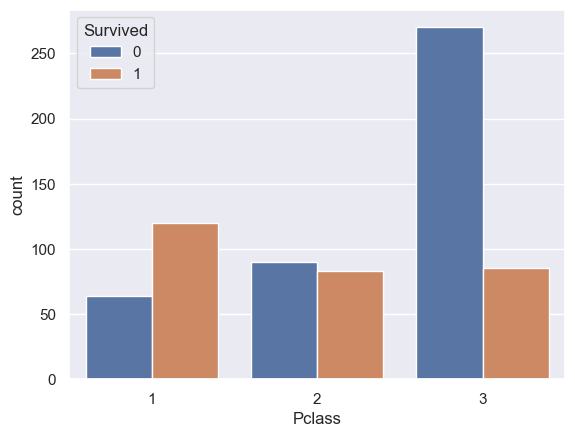

In [51]:
sns.countplot(x="Pclass", hue="Survived", data=df);

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

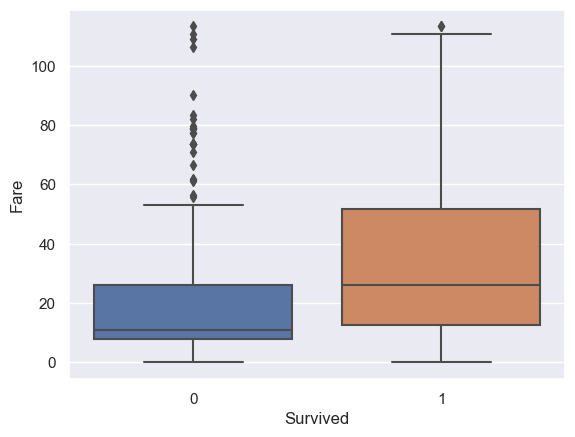

In [52]:
sns.boxplot(x='Survived', y='Fare', data=df[df['Fare'] < threshold])

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

<AxesSubplot:xlabel='Survived', ylabel='Age'>

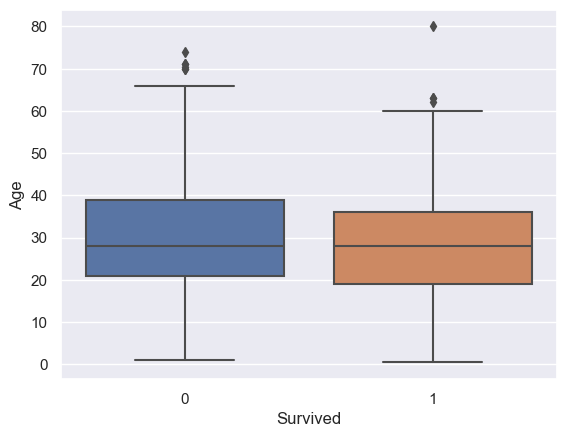

In [53]:
sns.boxplot(x="Survived", y="Age", data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

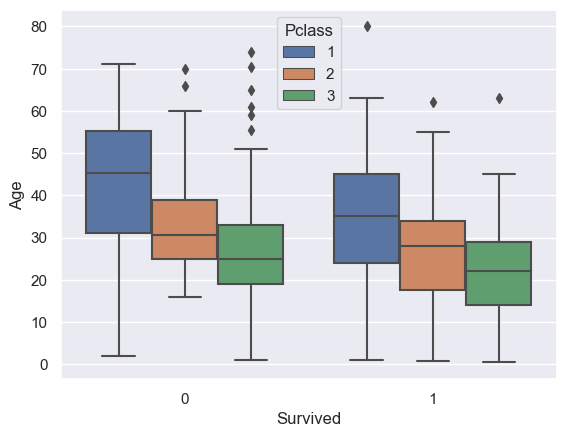

In [54]:
sns.boxplot(x="Survived", hue="Pclass", y="Age", data=df)

In [ ]:
pd.crosstab(train_df["age_cat"], train_df["Survived"])

In [47]:
young_vs_old = df[(df['Age'] < 30) | (df['Age'] > 55)]
young_vs_old['age_group'] = young_vs_old['Age'].map(lambda a: 'age < 30' if a < 30 else 'age > 55' )

/var/folders/dr/5phn3sld4g54qs4f08mhmc5w0000gn/T/ipykernel_2418/801969691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_vs_old['age_group'] = young_vs_old['Age'].map(lambda a: 'age < 30' if a < 30 else 'age > 55' )


<AxesSubplot:xlabel='age_group', ylabel='count'>

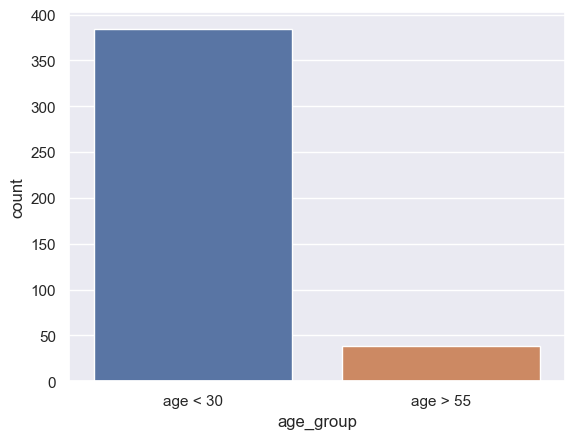

In [50]:
sns.countplot(data=young_vs_old, x='age_group')

## Useful resources
* The same notebook as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-practice-visualization) with a [solution](https://www.kaggle.com/kashnitsky/topic-2-practice-solution)
* Topic 2 "Visual data analysis in Python" as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)